pip install yfinance pandas numpy scikit-learn joblib matplotlib


In [1]:
# train_model.ipynb (или .py)

import yfinance as yf
import pandas as pd
import numpy as np

symbol = "AAPL"

data = yf.download(symbol, start="2018-01-01", end="2024-12-01")
data.head()


/var/folders/bp/09h3qc1n4q381gr_7jbrhkw00000gn/T/ipykernel_52873/3062990191.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start="2018-01-01", end="2024-12-01")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2018-01-02,40.341896,40.351266,39.639320,39.850095,102223600
2018-01-03,40.334869,40.878196,40.271640,40.405128,118071600
2018-01-04,40.522217,40.625262,40.299735,40.407462,89738400
2018-01-05,40.983578,41.070228,40.526904,40.618239,94640000
2018-01-08,40.831345,41.126425,40.732981,40.831345,82271200


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np

symbol = "AAPL"

data = yf.download(
    symbol,
    start="2018-01-01",
    end="2024-12-01",
    auto_adjust=True
)

print("Before:", data.columns)

# Если колонки — MultiIndex (Price / Ticker), убираем уровень Ticker
if isinstance(data.columns, pd.MultiIndex):
    data.columns = data.columns.droplevel(1)

print("After:", data.columns)
print(data.head())
print(data.tail())


[*********************100%***********************]  1 of 1 completed

Before: MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])
After: Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')
Price           Close       High        Low       Open     Volume
Date                                                             
2018-01-02  40.341896  40.351266  39.639320  39.850095  102223600
2018-01-03  40.334869  40.878196  40.271640  40.405128  118071600
2018-01-04  40.522217  40.625262  40.299735  40.407462   89738400
2018-01-05  40.983578  41.070228  40.526904  40.618239   94640000
2018-01-08  40.831345  41.126425  40.732981  40.831345   82271200
Price            Close        High         Low        Open    Volume
Date                                                                
2024-11-22  228.835037  229.681216  227.033189  227.033189  38168300
2024-11-25  231.821518  232.199812  2

In [3]:
data["return_1d"] = data["Close"].pct_change()
data["SMA_5"] = data["Close"].rolling(5).mean()
data["SMA_10"] = data["Close"].rolling(10).mean()
data["price_over_sma5"] = data["Close"] / data["SMA_5"]
data["target"] = (data["Close"].shift(-1) > data["Close"]).astype(int)

data = data.dropna().copy()


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import joblib

features = ["return_1d", "SMA_5", "SMA_10", "price_over_sma5"]
X = data[features]
y = data["target"]

# Делим по времени (shuffle=False)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

model = RandomForestClassifier(
    n_estimators=200,
    max_depth=5,
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Classification report:")
print(classification_report(y_test, y_pred))
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

# Сохраняем модель
joblib.dump(model, "model.joblib")
print("Model saved to model.joblib")


Classification report:
              precision    recall  f1-score   support

           0       0.44      0.67      0.53       156
           1       0.52      0.30      0.38       191

    accuracy                           0.46       347
   macro avg       0.48      0.48      0.45       347
weighted avg       0.48      0.46      0.45       347

Confusion matrix:
[[104  52]
 [134  57]]
Model saved to model.joblib


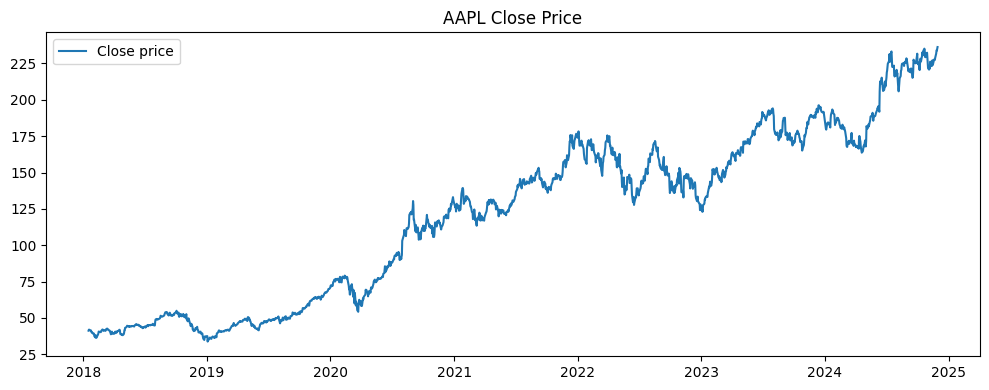

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(data.index, data["Close"], label="Close price")
plt.title("AAPL Close Price")
plt.legend()
plt.tight_layout()
plt.show()
